In [1]:
import numpy
from pandas import read_csv
import pandas as pd
from numpy import arange
import operator
import pandas as pd
import numpy as np
import operator
import sys
from gensim.models import Word2Vec
from gensim.test.utils import common_texts, get_tmpfile
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm, tree
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
import matplotlib.patches as mpatches
import seaborn as sns
from gensim.models.keyedvectors import KeyedVectors
from pandas.plotting import scatter_matrix
from pandas import set_option
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import plotly
import plotly.express as px
from pandas import set_option
from numpy import set_printoptions
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score
import statsmodels.api as sm

In [97]:
!pip install wandb
import wandb
wandb.init(project="visualize-sklearn")

You should consider upgrading via the '/Users/tmedeiros/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


wandb: wandb version 0.10.13 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


In [2]:
binary_vectors = 'stock2vec_Keyed_Binary.bin'
text_vectors = 'stock2vec_Keyed_Text.vec'

model = KeyedVectors.load_word2vec_format(text_vectors, binary=False)
word_dict = {}
embeddings = []
symbols = []
for word in model.vocab:
    word_dict[word] = model[word]
    #embeddings.append(model2[word])

for key in word_dict:
    embeddings.append(word_dict[key])
#embeddings
len(word_dict)

505

In [3]:
weights = model.wv.vectors
weights

<ipython-input-3-5a8ad5b79ee4>:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  weights = model.wv.vectors


array([[-0.14497213, -0.45860606, -1.1782019 , -1.1941084 ],
       [ 0.7040044 , -1.1718557 , -0.2739038 ,  1.0556908 ],
       [-0.15832463, -0.7564409 , -1.0549943 , -0.7916976 ],
       ...,
       [ 0.5649781 ,  0.12315261, -0.9708491 ,  0.56072503],
       [ 0.628613  , -0.09328333, -0.77231306, -0.04612734],
       [ 0.605424  , -0.09975752, -0.82908016,  0.04775446]],
      dtype=float32)

In [13]:
esg = read_csv('../notebooks/content/esg.csv', )
esg.columns

Index(['Symbol', 'Name', 'Sector', 'Price', 'Price/Earnings', 'Dividend Yield',
       'Earnings/Share', '52 Week Low', '52 Week High', 'Market Cap', 'EBITDA',
       'Price/Sales', 'Price/Book', 'SEC Filings', 'ESG-2016', 'ESG-2017',
       'ESG-2018', 'ESG-2019', 'ESG-2020', 'Average ESG', 'Risk Level',
       'ESG Rating', 'Symbol.1', 'Name.1', 'Unnamed: 24'],
      dtype='object')

In [14]:
columns = ['Symbol', 'Name', 'Sector', 'Price', 'PricePerEarnings', 'DividendYield', 'EarningsPerShare', '52WeekLow', '52WeekHigh', 'MarketCap', 'ESGRating']
#columns = ['price', 'price_per_earnings', 'dividend_yield', 'earnings_per_share', '52_week_low', '52_week_high', 'market_cap', 'esg_rating']
#esg = esg[['Symbol', 'Name', 'Sector','Price', 'Price/Earnings', 'Dividend Yield', 'Earnings/Share', '52 Week Low', '52 Week High', 'Market Cap', 'ESG Rating']]
esg = esg[['Symbol', 'Name', 'Sector','Price', 'Price/Earnings', 'Dividend Yield', 'Earnings/Share', '52 Week Low', '52 Week High', 'Market Cap', 'ESG Rating']]
esg.columns = columns
esg['Vector1'] = 0.0
esg['Vector2'] = 0.0
esg['Vector3'] = 0.0
esg['Vector4'] = 0.0
esg.dropna(inplace=True)
target = esg.pop("ESGRating")
esg.shape

#target = esg.pop('esg_rating')

(461, 14)

In [15]:
esg.head()

,Symbol,Name,Sector,Price,PricePerEarnings,DividendYield,EarningsPerShare,52WeekLow,52WeekHigh,MarketCap,Vector1,Vector2,Vector3,Vector4
0,MMM,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.77,175.490,1.387210e+11,0.0,0.0,0.0,0.0
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,68.39,48.925,1.078342e+10,0.0,0.0,0.0,0.0
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,64.60,42.280,1.021210e+11,0.0,0.0,0.0,0.0
3,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,125.86,60.050,1.813860e+11,0.0,0.0,0.0,0.0
4,ACN,Accenture plc,Information Technology,150.51,25.47,1.714470,5.44,162.60,114.820,9.876586e+10,0.0,0.0,0.0,0.0


In [16]:
for symbol in esg['Symbol']:
    esg.loc[esg['Symbol']==symbol, 'Vector1'] = word_dict[symbol][0]
    esg.loc[esg['Symbol']==symbol, 'Vector2'] = word_dict[symbol][1]
    esg.loc[esg['Symbol']==symbol, 'Vector3'] = word_dict[symbol][2]
    esg.loc[esg['Symbol']==symbol, 'Vector4'] = word_dict[symbol][3]

In [64]:
target

0      34.9
1      32.6
2      29.8
3      29.1
4      11.3
       ... 
500    16.4
501    18.1
502    34.2
503    25.4
504    24.3
Name: esg_rating, Length: 461, dtype: float64

In [17]:
dataset = esg[['Price', 'PricePerEarnings', 'DividendYield', 'EarningsPerShare', '52WeekLow', 
               '52WeekHigh', 'MarketCap','Vector1', 'Vector2', 'Vector3', 'Vector4' ]]

In [18]:
dataset.head()

,Price,PricePerEarnings,DividendYield,EarningsPerShare,52WeekLow,52WeekHigh,MarketCap,Vector1,Vector2,Vector3,Vector4
0,222.89,24.31,2.332862,7.92,259.77,175.490,1.387210e+11,0.304746,-1.149245,-0.353319,-2.837031
1,60.24,27.76,1.147959,1.70,68.39,48.925,1.078342e+10,-0.213970,-0.436910,-1.272887,-0.784875
2,56.27,22.51,1.908982,0.26,64.60,42.280,1.021210e+11,0.129664,-1.113122,-0.635674,-1.020973
3,108.48,19.41,2.499560,3.29,125.86,60.050,1.813860e+11,0.180174,-1.167327,-0.749103,1.010242
4,150.51,25.47,1.714470,5.44,162.60,114.820,9.876586e+10,0.228507,-0.474911,-0.782801,-2.162982


In [21]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:11]
Y = target
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
test_size=validation_size, random_state=seed)

In [22]:
X = sm.add_constant(X)
model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              ESGRating   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     5.193
Date:                Tue, 02 Feb 2021   Prob (F-statistic):           1.04e-07
Time:                        15:26:08   Log-Likelihood:                -1810.9
No. Observations:                 461   AIC:                             3646.
Df Residuals:                     449   BIC:                             3695.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -24.3845     18.063     -1.350      0.1

In [23]:
#!pip install rfpimp
model2 = LinearRegression()
model2.fit(dataset, target)

validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(dataset, Y,
test_size=validation_size, random_state=seed)
import rfpimp
imp = rfpimp.importances(model2, X_validation, Y_validation)
imp

/Users/tmedeiros/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


,Importance
Feature,
Vector3,42.513337
Vector1,18.494213
Vector2,4.830453
Vector4,1.083781
52WeekHigh,0.392648
Price,0.151392
52WeekLow,0.054388
MarketCap,0.047204
DividendYield,0.038813


In [28]:
import plotly.express as px
fig = px.bar(imp, title="Permutation Feature Importance",
            labels={"x": "Number of Components", "y": "Cumulative Explained Variance"})
fig.update_traces(showlegend=False, selector=dict(type='bar'))
fig.update_xaxes(title_font=dict(size=18, family='Courier', color='black'),showgrid=False)
fig.update_yaxes(title_font=dict(size=18, family='Courier', color='black'),showgrid=False)
fig.update_layout( title={'text':"Permutation Feature Importance",
                         'y':0.85,
                         'yanchor': 'top',
                         'x':0.5,
                         'xanchor': 'center'})
fig.update_layout({'plot_bgcolor': 'rgba(0,0,0,0)',
                           'paper_bgcolor': 'rgba(0,0,0,0)'
                  })
fig.update_layout(
    xaxis_title="ESG Ratings Features",
    yaxis_title="Importance Score",
    legend_title="Legend Title",
    font=dict(
        family="Time New",
        size=16,
        color="black"
    )
)

fig.show()

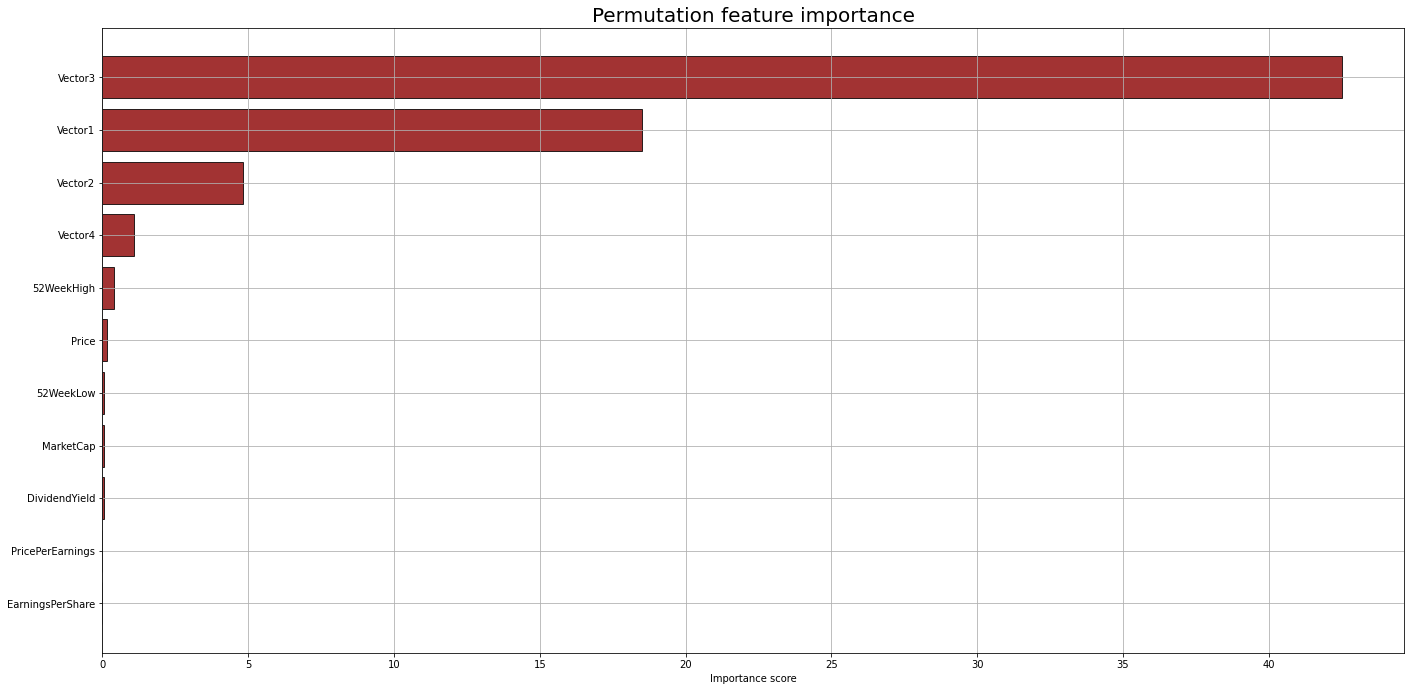

In [24]:
fig, ax = plt.subplots(figsize=(20, 10))
SMALL_SIZE = 20
MEDIUM_SIZE = 20
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

ax.barh(imp.index, imp['Importance'], height=0.8, facecolor='darkred', alpha=0.8, edgecolor='k')
ax.set_xlabel('Importance score')
ax.set_title('Permutation feature importance')
ax.text(0.8, 0.15, '', fontsize=12, ha='center', va='center',
        transform=ax.transAxes, color='grey', alpha=0.9)
plt.grid(b=None)
plt.gca().invert_yaxis()

fig.tight_layout()